# Regression Example

## Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [113]:
path = "/home/adrian_alvarez/Projects/NBA_over_under_predictor/data/train_data/training_data_20051201_to_20260110.csv"

df_stats = pd.read_csv(path)

dtype_dict = {col: str for col in df_stats.columns if "ID" in col.upper()}

df_stats = pd.read_csv(
    path,
    dtype=dtype_dict
)
df_stats['GAME_DATE'] = pd.to_datetime(df_stats['GAME_DATE']).dt.strftime('%Y-%m-%d')

/tmp/ipykernel_1958469/1308710969.py:3: DtypeWarning: Columns (200,202,204,210,212,214,220,222,224,230,232,234,240,242,244,428,430,432,438,440,442,448,450,452,458,460,462,468,470,472) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(path)
/tmp/ipykernel_1958469/1308710969.py:7: DtypeWarning: Columns (200,202,204,210,212,214,220,222,224,230,232,234,240,242,244,428,430,432,438,440,442,448,450,452,458,460,462,468,470,472) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(


In [114]:
df_stats

,TOTAL_OVER_UNDER_LINE,TEAM_ID_TEAM_HOME,TEAM_CITY_TEAM_HOME,TEAM_ABBREVIATION_TEAM_HOME,TEAM_NAME_TEAM_HOME,MATCHUP_TEAM_HOME,GAME_NUMBER_TEAM_HOME,TEAM_ID_TEAM_AWAY,TEAM_CITY_TEAM_AWAY,TEAM_ABBREVIATION_TEAM_AWAY,...,PTS_TREND_SLOPE_DIFF_HOME_MINUS_AWAY,PTS_TREND_SLOPE_SUM_HOME_PLUS_AWAY,TRAVEL_RECENCY_RATIO_HOME_2D_OVER_14D,TRAVEL_RECENCY_RATIO_AWAY_2D_OVER_14D,REST_DAYS_DIFF_HOME_MINUS_AWAY,INJURY_PTS_SHARE_HOME,INJURY_PTS_SHARE_AWAY,STAR_PTS_PCT_DIFF_HOME_MINUS_AWAY,POSS_X_TSPCT_HOME,POSS_X_TSPCT_AWAY
0,214.4999,1610612765,Detroit,DET,Detroit Pistons,DET vs. LAC,38,1610612746,LA,LAC,...,-8.5,-3.3,0.000000,0.234741,2,0.0,0.0,-0.156654,58.903713,56.344278
1,240.9999,1610612762,Utah,UTA,Utah Jazz,UTA vs. CHA,38,1610612766,Charlotte,CHA,...,1.7,-3.1,0.788795,0.000000,0,0.0,0.0,0.023257,60.554014,57.945169
2,230.4999,1610612738,Boston,BOS,Boston Celtics,BOS vs. SAS,38,1610612759,San Antonio,SAS,...,4.2,-4.4,0.000000,0.000000,-2,0.0,0.0,0.044682,57.935403,58.739776
3,233.4999,1610612741,Chicago,CHI,Chicago Bulls,CHI vs. DAL,38,1610612742,Dallas,DAL,...,2.3,0.1,0.000000,0.766714,1,0.0,0.0,-0.010866,58.536893,57.259851
4,236.4999,1610612754,Indiana,IND,Indiana Pacers,IND vs. MIA,39,1610612748,Miami,MIA,...,8.6,-1.6,0.727915,0.000000,-2,0.0,0.0,0.004432,57.364189,58.430339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23675,215.5000,1610612761,Toronto,TOR,Toronto Raptors,TOR vs. PHI,1,1610612755,Philadelphia,PHI,...,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,52.197778,48.062250
23676,203.0000,1610612753,Orlando,ORL,Orlando Magic,ORL vs. MIL,1,1610612749,Milwaukee,MIL,...,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,56.896560,48.059111
23677,208.5000,1610612759,San Antonio,SAS,San Antonio Spurs,SAS vs. POR,1,1610612757,Portland,POR,...,NaN,NaN,NaN,NaN,-1,0.0,0.0,NaN,56.762222,50.564222
23678,192.0000,1610612744,Golden State,GSW,Golden State Warriors,GSW vs. UTA,1,1610612762,Utah,UTA,...,NaN,NaN,NaN,NaN,0,0.0,0.0,NaN,51.121000,48.781375


In [115]:
#count nas in TOTA_OVER_UNDER_LINE
nans = df_stats['TOTAL_OVER_UNDER_LINE'].isna().sum()
print(f"Number of NaNs in TOTAL_OVER_UNDER_LINE: {nans}")

Number of NaNs in TOTAL_OVER_UNDER_LINE: 1707


In [116]:
df_stats.dropna(subset=['TOTAL_OVER_UNDER_LINE'], inplace=True)
df_stats = df_stats[df_stats['TOTAL_OVER_UNDER_LINE'] != 0]

In [117]:
df_stats['SEASON_YEAR'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007])

In [118]:
#drop season 2007
df_stats = df_stats[df_stats['SEASON_YEAR'] != 2007]

In [119]:
df_to_train = df_stats.copy()

In [120]:
text_columns = df_to_train.select_dtypes(include=['object', 'string']).columns

# Print the names of the columns containing text
print("Text columns:", list(text_columns))
cols_to_drop = ['SEASON_ID', 'GAME_ID', 'SEASON_TYPE', 'GAME_DATE', 'TEAM_ID_TEAM_HOME',
       'TEAM_ID_TEAM_AWAY', 'SEASON_YEAR', 'IS_OVERTIME']

cols_to_drop += [
    "MATCHUP_TEAM_HOME",
    "GAME_NUMBER_TEAM_HOME",
    "TEAM_CITY_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_HOME",
    "TEAM_CITY_TEAM_HOME",
    "TEAM_NAME_TEAM_AWAY",
    "MATCHUP_TEAM_AWAY",
    'TEAM_NAME_TEAM_HOME'
]
cols_to_drop += list(text_columns)

df_to_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')


Text columns: ['TEAM_ID_TEAM_HOME', 'TEAM_CITY_TEAM_HOME', 'TEAM_ABBREVIATION_TEAM_HOME', 'TEAM_NAME_TEAM_HOME', 'MATCHUP_TEAM_HOME', 'TEAM_ID_TEAM_AWAY', 'TEAM_CITY_TEAM_AWAY', 'TEAM_ABBREVIATION_TEAM_AWAY', 'TEAM_NAME_TEAM_AWAY', 'MATCHUP_TEAM_AWAY', 'SEASON_ID', 'GAME_ID', 'GAME_DATE', 'SEASON_TYPE', 'TOP1_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP2_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP3_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP4_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP5_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP6_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP1_INJURED_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP2_INJURED_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP3_INJURED_PLAYER_NAME_PTS_BEFORE_TEAM_HOME', 'TOP1_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP2_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP3_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP4_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP5_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP6_PLAYER_NAME_PACE_PER40_BEFORE_TEAM_HOME', 'TOP1_INJURED_

In [121]:
# Count NAs per column
na_counts = df_to_train.isna().sum()
na_counts_df = pd.DataFrame({
    'Column': na_counts.index,
    'NA_Count': na_counts.values,
    'NA_Percentage': (na_counts.values / len(df_to_train) * 100).round(2)
}).sort_values('NA_Count', ascending=False)

# Show only columns with NAs
na_counts_df[na_counts_df['NA_Count'] > 0]

,Column,NA_Count,NA_Percentage
342,TOTAL_OVER_UNDER_LINE_COMBINED_TREND_SLOPE_LAS...,3254,15.68
340,TOTAL_OVER_UNDER_LINE_TEAM_HOME_TREND_SLOPE_LA...,2639,12.71
341,TOTAL_OVER_UNDER_LINE_TEAM_AWAY_TREND_SLOPE_LA...,2614,12.59
382,TRAVEL_RECENCY_RATIO_AWAY_2D_OVER_14D,562,2.71
381,TRAVEL_RECENCY_RATIO_HOME_2D_OVER_14D,444,2.14
...,...,...,...
356,REF_2_DIFF_FROM_LINE_DIFF,16,0.08
355,REF_1_DIFF_FROM_LINE_DIFF,16,0.08
353,REF_2_TOTAL_POINTS_DIFF,16,0.08
354,REF_3_TOTAL_POINTS_DIFF,16,0.08


In [122]:
#Drop NAS in REF_1_TOTAL_POINTS_DIFF
df_to_train.dropna(subset=['REF_1_TOTAL_POINTS_DIFF'], inplace=True)

In [ ]:
# df_to_train.fillna(0, inplace=True)

In [123]:
# Get the columns to keep for checking nulls
columns_to_keep = [col for col in df_to_train.columns if col not in cols_to_drop]

# Drop rows where any of the columns_to_check have nulls
df_to_train = df_to_train.dropna(subset=columns_to_keep)
df_to_train

,TOTAL_OVER_UNDER_LINE,GAME_NUMBER_TEAM_AWAY,IS_PLAYOFF_GAME,PLAYOFF_GAMES_LAST_SEASON_TEAM_AWAY,PLAYOFF_GAMES_LAST_SEASON_TEAM_HOME,WINS_BEFORE_THIS_GAME_TEAM_HOME,LOSSES_BEFORE_THIS_GAME_TEAM_HOME,TEAM_RECORD_BEFORE_GAME_TEAM_HOME,REST_DAYS_BEFORE_MATCH_TEAM_HOME,PTS_LAST_ALL_5_MATCHES_BEFORE_TEAM_HOME,...,PTS_TREND_SLOPE_DIFF_HOME_MINUS_AWAY,PTS_TREND_SLOPE_SUM_HOME_PLUS_AWAY,TRAVEL_RECENCY_RATIO_HOME_2D_OVER_14D,TRAVEL_RECENCY_RATIO_AWAY_2D_OVER_14D,REST_DAYS_DIFF_HOME_MINUS_AWAY,INJURY_PTS_SHARE_HOME,INJURY_PTS_SHARE_AWAY,STAR_PTS_PCT_DIFF_HOME_MINUS_AWAY,POSS_X_TSPCT_HOME,POSS_X_TSPCT_AWAY
16,238.9999,39,0,9.0,15.0,23,13,0.638889,2,111.4,...,1.7,3.1,0.816795,0.699768,0,0.040750,0.097239,-0.000668,59.293794,58.911286
17,232.4999,38,0,23.0,0.0,13,24,0.351351,1,115.6,...,-13.5,-1.5,0.853558,0.808722,-1,0.165595,0.392258,-0.045639,57.719124,54.663153
18,243.4999,38,0,0.0,0.0,12,24,0.333333,1,112.8,...,0.4,-3.6,0.862734,0.859466,-1,0.307749,0.202595,0.045649,60.655270,56.899805
19,230.4999,37,0,14.0,11.0,23,12,0.657143,2,123.6,...,-1.5,-3.3,0.896187,0.551947,0,0.027451,0.418027,0.036066,58.258731,61.952435
20,222.9999,36,0,7.0,18.0,23,13,0.638889,2,114.0,...,-4.6,2.8,0.743835,0.000000,0,0.210809,0.236314,-0.012675,57.957400,56.065596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22238,197.0000,9,0,6.0,5.0,7,0,1.000000,2,104.0,...,3.5,5.9,0.764730,0.546480,1,0.000000,0.000000,0.032049,55.057025,48.293071
22240,189.0000,9,0,23.0,18.0,5,3,0.625000,2,106.8,...,-4.0,-1.0,0.823794,0.801114,0,0.000000,0.074725,-0.038439,54.695755,47.807547
22241,191.0000,9,0,0.0,0.0,4,3,0.571429,2,91.6,...,-9.8,3.4,0.000000,0.635992,0,0.000000,0.000000,0.014580,50.669063,48.587953
22244,215.0000,9,0,7.0,0.0,2,5,0.285714,2,88.0,...,2.7,-6.1,0.805398,0.742412,0,0.363388,0.000000,0.091931,47.135375,49.818824


In [124]:
null_rows = df_to_train[df_to_train.isnull().any(axis=1)]
print(f"Total number of null values in the DataFrame: {null_rows.shape[0]}")
print(f"Percentage of null values in the DataFrame: {null_rows.shape[0] / df_to_train.shape[0] * 100:.2f}%")
print(f"Total number of rows in the DataFrame: {df_to_train.shape[0]}")

null_columns = df_to_train.columns[df_to_train.isnull().any()].tolist()
print(f"Columns with null values: {null_columns}")


Total number of null values in the DataFrame: 0
Percentage of null values in the DataFrame: 0.00%
Total number of rows in the DataFrame: 17200
Columns with null values: []


## Train / Test

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X = df_to_train.drop(cols_to_drop + ['TOTAL_POINTS'], axis=1, errors='ignore')
y = df_to_train['TOTAL_POINTS']

In [127]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [128]:
df_to_train['IS_TRAINING_DATA'] = False

# Mark True for the rows in the training set
df_to_train.loc[X_train.index, 'IS_TRAINING_DATA'] = True

# df_to_train.to_csv("/home/adrian_alvarez/Projects/NBA-predictor/lab/integrate_all_bets/ignore_nba_games_2006_2024_training_data_with_players_and_lines_info_train_test_set.csv", index=False)

In [129]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
# Check number of coulmns
print(f"Number of columns in training set: {X_train.shape[1]}")
print(f"Number of columns in test set: {X_test.shape[1]}")

Training set size: 14620
Test set size: 2580
Number of columns in training set: 388
Number of columns in test set: 388


## Cross-validation

In [130]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, root_mean_squared_error

In [131]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=16)

In [132]:
# Declare scores to be used
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(root_mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
}

In [133]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(5))
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(5))
        print()
    

In [134]:
def real_vs_pred(model, X_train, y_train):
    preds = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
    x_line = np.arange(y_train.min(), y_train.max())
    plt.scatter(y_train, preds)
    plt.plot(x_line, x_line, color='orange')
    plt.xlabel('Real target')
    plt.ylabel('Predicted target')
    plt.show()

## Baseline

In [135]:
from sklearn.dummy import DummyRegressor

In [136]:
season_bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(season_bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
season_bl.fit(X_train, y_train)
print_metrics(cv_results)

Train MSE: 512.79151
Validation MSE: 512.95406

Train RMSE: 22.64484
Validation RMSE: 22.64754

Train MAE: 18.2968
Validation MAE: 18.29966



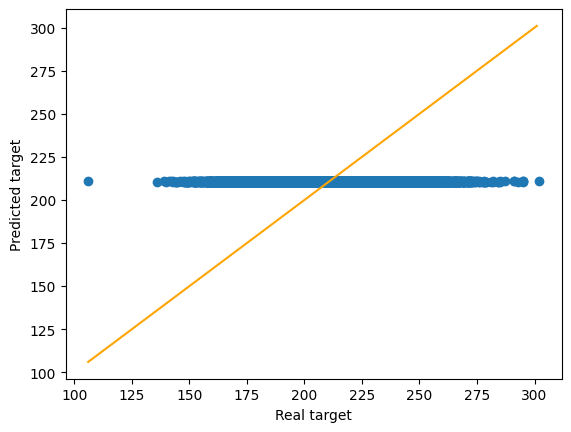

In [137]:
real_vs_pred(season_bl, X_train, y_train)

In [138]:
y_pred_baseline_2 = X_train['PTS_SEASON_BEFORE_AVG_TEAM_HOME'] + X_train['PTS_SEASON_BEFORE_AVG_TEAM_AWAY']

# Evaluate manually
mse = mean_squared_error(y_train, y_pred_baseline_2)
mae = mean_absolute_error(y_train, y_pred_baseline_2)
rmse = root_mean_squared_error(y_train, y_pred_baseline_2)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 333.62
RMSE: 18.27
MAE: 14.51


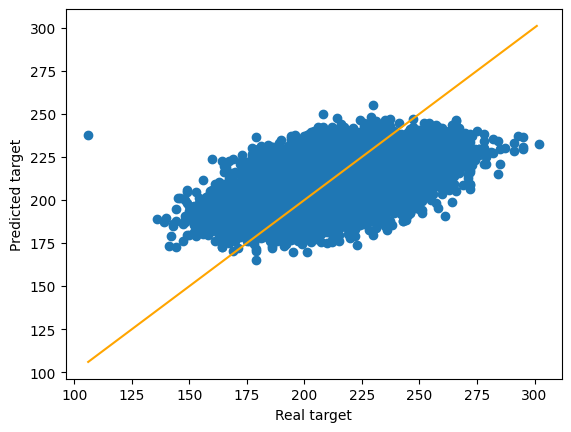

In [139]:
x_line = np.arange(y_train.min(), y_train.max())
plt.scatter(y_train, y_pred_baseline_2)
plt.plot(x_line, x_line, color='orange')
plt.xlabel('Real target')
plt.ylabel('Predicted target')
plt.show()

## Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

lr.fit(X_train, y_train)
print_metrics(cv_results)

Train MSE: 274.50603
Validation MSE: 296.93499

Train RMSE: 16.56813
Validation RMSE: 17.22849

Train MAE: 13.19544
Validation MAE: 13.65911



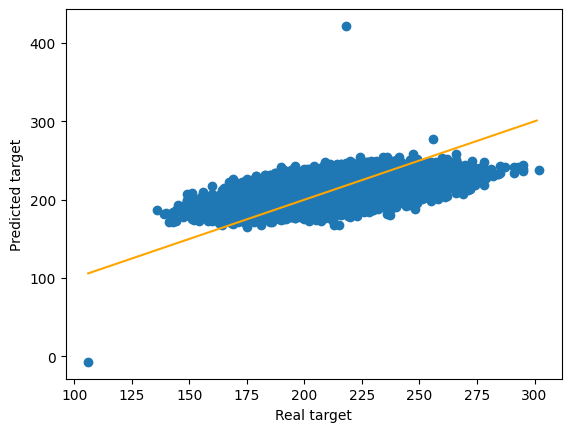

In [142]:
real_vs_pred(lr, X_train, y_train)

## Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
X_train.shape

(14620, 388)

In [145]:
rf = RandomForestRegressor(100, max_depth=5, max_features=0.6, n_jobs=-1, random_state=16)
cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True, n_jobs=-1)

rf.fit(X_train, y_train)
print_metrics(cv_results)

Train MSE: 279.28995
Validation MSE: 299.8703

Train RMSE: 16.71187
Validation RMSE: 17.31512

Train MAE: 13.31805
Validation MAE: 13.76806



In [146]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

# Example XGBoost regressor:
xgb_reg = XGBRegressor(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=500,
    subsample=1.0,       # Equivalent to max_samples in GBRegressor
    colsample_bytree=0.8, # Equivalent to max_features in GBRegressor
    n_jobs=-1 
)

cv_results = cross_validate(
    xgb_reg, 
    X_train, y_train, 
    cv=kf, 
    scoring=scoring,      # Use your custom scoring or e.g. 'neg_mean_absolute_error'
    return_train_score=True,
    n_jobs=-1
)
# Train final model on full train set
xgb_reg.fit(X_train, y_train)

# Print metrics
print_metrics(cv_results)

Train MSE: 106.00595
Validation MSE: 297.65489

Train RMSE: 10.29554
Validation RMSE: 17.25061

Train MAE: 8.07462
Validation MAE: 13.69194



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search

### Grid Search

In [ ]:
def print_rs_reg_scores(rs_model, best_idx):
    print(rs_model.best_params_)
    print()
    print('Train MAE:', rs_model.cv_results_['mean_train_MAE'][best_idx].round(5))
    print('Validation MAE:', rs_model.cv_results_['mean_test_MAE'][best_idx].round(5))
    # print()
    print('Train MSE:', rs_model.cv_results_['mean_train_MSE'][best_idx].round(5))
    print('Validation MSE:', rs_model.cv_results_['mean_test_MSE'][best_idx].round(5))
    # print('Train MedAE:', rs_model.cv_results_['mean_train_MedAE'][best_idx].round(1))
    # print('Validation MedAE:', rs_model.cv_results_['mean_test_MedAE'][best_idx].round(1))

In [ ]:
import os
n_jobs = max(1, os.cpu_count() - 2)
print(f"Number of jobs: {n_jobs}")

Number of jobs: 10


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [300, 400],  # Similar to GBRT
    'learning_rate': [0.02, 0.04, 0.03, 0.015],  # Fine-tuning LR
    'max_depth': [4, 5],  # Keeping it limited for efficiency
    'min_child_weight': [3, 4],  # Similar to min_samples_split in GBRT
    'subsample': [0.8, 0.5],  # Control for overfitting
    'colsample_bytree': [0.8, 1.0],  # Similar to max_features in GBRT
    'gamma': [0],  # Regularization parameter
}]

# GridSearchCV setup
xgb_gs = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(),  # Select best model based on MAE
    return_train_score=True,
    n_jobs=-1
)

# Fit model
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.5; MAE: (train=12.306, test=13.126) MSE: (train=238.542, test=272.754) RMSE: (train=15.445, test=16.515) total time=  26.4s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.8; MAE: (train=12.225, test=13.437) MSE: (train=235.445, test=286.393) RMSE: (train=15.344, test=16.923) total time=  28.3s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.5; MAE: (train=12.297, test=13.207) MSE: (train=238.519, test=273.358) RMSE: (train=15.444, test=16.534) total time=  29.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.8; MAE: (train=12.299, test=13.147) MSE: (train=238.162, 

/home/adrian_alvarez/Projects/NBA-predictor/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=3, n_estimators=400, subsample=0.5; MAE: (train=11.112, test=13.422) MSE: (train=194.306, test=286.029) RMSE: (train=13.939, test=16.912) total time= 1.4min
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.8; MAE: (train=11.443, test=13.473) MSE: (train=206.616, test=284.435) RMSE: (train=14.374, test=16.865) total time=  55.2s
[CV 3/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.8; MAE: (train=11.434, test=13.467) MSE: (train=205.940, test=287.725) RMSE: (train=14.351, test=16.962) total time= 1.0min
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.02, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.8; MAE: (train=11.498, test=13.225) MSE: (train=208.489, test=274.079) RMSE: (train=14.439, test=16.555) total time= 1.1

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'max_depth': [4, 5], 'min_child_weight': [3, 4],
                          'n_estimators': [300, 400],
                          'subsample': [0.8, 0.5]}],
             refit=<function <lambda> at 0x7e5ecd156700>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [ ]:
# Print metrics
xgb_gs.best_params_
print_rs_reg_scores(xgb_gs, xgb_gs.best_index_)

{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.5}

Train MAE: 12.48071
Validation MAE: 13.26246
Train MSE: 245.47229
Validation MSE: 278.07404


In [ ]:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.5}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [300,350],  # Similar to GBRT
    'learning_rate': [0.010, 0.012, 0.017, 0.015],  # Fine-tuning LR
    'max_depth': [5,4],  # Keeping it limited for efficiency
    'min_child_weight': [4,5],  # Similar to min_samples_split in GBRT
    'subsample': [0.5],  # Control for overfitting
    'colsample_bytree': [0.8],  # Similar to max_features in GBRT
    'gamma': [0],  # Regularization parameter
}]

# GridSearchCV setup
xgb_gs = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(),  # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.247, test=13.465) MSE: (train=236.758, test=285.043) RMSE: (train=15.387, test=16.883) total time=  22.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.321, test=13.152) MSE: (train=238.679, test=275.752) RMSE: (train=15.449, test=16.606) total time=  23.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=350, subsample=0.5; MAE: (train=12.174, test=13.203) MSE: (train=233.271, test=273.550) RMSE: (train=15.273, test=16.539) total time=  26.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.337, test=13.113) MSE: (train=239.261, t

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'max_depth': [5, 4], 'min_child_weight': [4, 5],
                          'n_estimators': [300, 350], 'subsample': [0.5]}],
             refit=<function <lambda> at 0x7e5eda6ad580>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [ ]:
# Print metrics
xgb_gs.best_params_
print_rs_reg_scores(xgb_gs, xgb_gs.best_index_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.012, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 350, 'subsample': 0.5}

Train MAE: 12.5412
Validation MAE: 13.26569
Train MSE: 247.93007
Validation MSE: 278.07378


In [ ]:
import pickle

# Get the best model
best_model = xgb_gs.best_estimator_
#get_date
import datetime
now = datetime.datetime.now()
date_today = now.strftime("%Y-%m-%d")
name = f"best_xgboost{date_today}.pkl"
name_config = f"best_xgboost_config_{date_today}.pkl"
# Save the best model
with open(name, "wb") as f:
    pickle.dump(best_model, f)

# Save the best model configuration
with open(name_config, "wb") as f:
    pickle.dump(xgb_gs.best_params_, f)

print("Best model saved as", name)

Best model saved as best_xgboost2025-04-09.pkl


In [ ]:
#load model
with open(name, "rb") as f:
    best_model = pickle.load(f)

In [ ]:
feature_importances = best_model.feature_importances_
important_features = np.argsort(feature_importances)[::-1]  
feature_importances = pd.DataFrame({
    'Feature': X_train.columns[important_features],
    'Importance': feature_importances[important_features]
}).sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
0,TOTAL_PTS_SEASON_BEFORE_AVG,0.050066
1,TOTAL_OVER_UNDER_LINE,0.047771
2,TOTAL_OVER_UNDER_LINE_SEASON_BEFORE_AVG_TEAM_HOME,0.044254
3,TOTAL_POINTS_SEASON_BEFORE_AVG_TEAM_AWAY,0.013697
4,TOTAL_OVER_UNDER_LINE_LAST_ALL_5_MATCHES_BEFOR...,0.009034
...,...,...
346,TOP4_INJURED_PLAYER_TS_PCT_BEFORE_TEAM_HOME,0.000000
347,TOP5_INJURED_PLAYER_PACE_PER40_BEFORE_TEAM_AWAY,0.000000
348,TOP6_INJURED_PLAYER_PACE_PER40_BEFORE_TEAM_HOME,0.000000
349,TOP6_INJURED_PLAYER_DEF_RATING_BEFORE_TEAM_HOME,0.000000


In [ ]:
only_important_features =  X_train.columns[important_features][:200]

In [ ]:
#repeat the analysis with only important features
xgb_reg_only_import = XGBRegressor(**best_model.get_params())

cv_results_important = cross_validate(
    xgb_reg_only_import, 
    X_train[only_important_features], y_train, 
    cv=kf, 
    scoring=scoring,      # Use your custom scoring or e.g. 'neg_mean_absolute_error'
    return_train_score=True,
    n_jobs=-1
)
# Train final model on full train set
xgb_reg_only_import.fit(X_train[only_important_features], y_train)

# Print metrics
print_metrics(cv_results_important)

Train MSE: 249.70255
Validation MSE: 277.28635

Train RMSE: 15.80192
Validation RMSE: 16.65089

Train MAE: 12.58724
Validation MAE: 13.24752



In [ ]:

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.012, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 350, 'subsample': 0.5}
# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=10)

# Define hyperparameter grid
params = [{
    'n_estimators': [350],  # Similar to GBRT
    'learning_rate': [0.011, 0.012,0.013, 0.014],  # Fine-tuning LR
    'max_depth': [3,4,5,6],  # Keeping it limited for efficiency
    'min_child_weight': [3,4,5],  # Similar to min_samples_split in GBRT
    'subsample': [0.6, 0.7, 0.5, 1, 0.8],  # Control for overfitting
    'colsample_bytree': [1,0.8],  # Similar to max_features in GBRT
    'gamma': [0],
    # 'reg_alpha': [0, 0.01, 0.1],
    # 'reg_lambda': [1, 1.5, 2],  # Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs= 10
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.6; MAE: (train=12.913, test=13.452) MSE: (train=263.526, test=286.542) RMSE: (train=16.233, test=16.928) total time=  13.5s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.7; MAE: (train=12.990, test=13.158) MSE: (train=266.168, test=275.524) RMSE: (train=16.315, test=16.599) total time=  16.3s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.6; MAE: (train=12.987, test=13.162) MSE: (train=266.031, test=275.490) RMSE: (train=16.310, test=16.598) total time=  17.0s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.7; MAE: (train=12.919, test=13.444) MSE: (train=263.649, test=286.315) RMSE: (train=16.237, test=16.921) total time=  18.4s


GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'min_child_weight': [3, 4, 5], 'n_estimators': [350],
                          'subsample': [0.6, 0.7, 0.5, 1, 0.8]}],
             refit=<function <lambda> at 0x7e5ecce08220>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [ ]:
# Print metrics
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 350, 'subsample': 0.5}

Train MAE: 12.47023
Validation MAE: 13.24543
Train MSE: 245.07321
Validation MSE: 277.17739


In [104]:

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 350, 'subsample': 0.5}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [350],  # Similar to GBRT
    'learning_rate': [0.014, 0.015],  
    'max_depth': [4],  # Keeping it limited for efficiency
    'min_child_weight': [ 5,6],  # Similar to min_samples_split in GBRT
    'subsample': [0.5, 0.4],  # Control for overfitting
    'colsample_bytree': [1],  # Similar to max_features in GBRT
    'gamma': [0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2], 
    'colsample_bylevel': [0.7, 0.8,  1.0],
    'colsample_bynode': [0.8, 0.9, 1.0],# Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[CV 5/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.5; MAE: (train=12.558, test=13.099) MSE: (train=248.197, test=271.659) RMSE: (train=15.754, test=16.482) total time=  13.1s
[CV 3/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.5; MAE: (train=12.482, test=13.453) MSE: (train=245.376, test=286.822) RMSE: (train=15.664, test=16.936) total time=  14.9s
[CV 1/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.4; MAE: (train=12.553, test=13.150) MSE: (train=248.115, test=274.151) RMSE: (train=15.752, test=16.558) total time=  16.4s
[CV 3/5] END colsample_bylevel=0.7

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'reg_alpha': [0, 0.01, 0.1],
                          'reg_lambda': [1, 1.5, 2], 'subsample': [0.5, 0.4]}],
             refit=<function <lambda> at 0x7e5ef35ea0c0>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [105]:
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

Train MAE: 12.45754
Validation MAE: 13.23756
Train MSE: 244.81766
Validation MSE: 276.9498


In [109]:
{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [350, 400, 450, 1000],  # Similar to GBRT
    'learning_rate': [0.015],  
    'max_depth': [4,5],  # Keeping it limited for efficiency
    'min_child_weight': [ 6],  # Similar to min_samples_split in GBRT
    'subsample': [0.4],  # Control for overfitting
    'colsample_bytree': [1],  # Similar to max_features in GBRT
    'gamma': [0],
    'reg_alpha': [0.01],
    'reg_lambda': [2], 
    'colsample_bylevel': [1.0],
    'colsample_bynode': [0.8],# Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV 1/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=350, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.480, test=13.120) MSE: (train=245.390, test=273.383) RMSE: (train=15.665, test=16.534) total time=   8.6s
[CV 4/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=350, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.484, test=13.154) MSE: (train=246.051, test=271.832) RMSE: (train=15.686, test=16.487) total time=   8.5s
[CV 2/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=400, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.319, test=13.421) MSE: (train=239.570, test=282.817) RMSE: (train=15.478, test=16.817) total time=   8.4s
[CV 2/5] END colsample_by

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'n_estimators': [350, 400, 450, 1000],
                          'reg_alpha': [0.01], 'reg_lambda': [2],
                          'subsample': [0.4]}],
             refit=<function <lambda> at 0x7e5ef340e480>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [110]:
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

Train MAE: 12.45754
Validation MAE: 13.23756
Train MSE: 244.81766
Validation MSE: 276.9498


In [111]:
import pickle

# Get the best model
best_model = xgb_gs_import.best_estimator_
#get_date
import datetime
now = datetime.datetime.now()
date_today = now.strftime("%Y-%m-%d")
name = f"best_xgboost_important{date_today}.pkl"
name_config = f"best_xgboost_important_config_{date_today}.pkl"
# Save the best model
with open(name, "wb") as f:
    pickle.dump(best_model, f)

# Save the best model configuration
with open(name_config, "wb") as f:
    pickle.dump(xgb_gs_import.best_params_, f)

print("Best model saved as", name)

Best model saved as best_xgboost_important2025-04-09.pkl


# Train whole data

In [ ]:
# name = "/home/adrian_alvarez/Projects/NBA-predictor/lab/integrate_all_bets/best_xgboost_important2025-04-06.pkl"

In [112]:
import pickle

with open(name, "rb") as f:
    best_model = pickle.load(f)

best_params = best_model.get_params()

In [113]:
from xgboost import XGBRegressor

production_model = XGBRegressor(**best_params)
production_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.015, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=350,
             n_jobs=-1, num_parallel_tree=None, random_state=16, ...)

In [114]:
import datetime

date_today = datetime.datetime.now().strftime("%Y-%m-%d")
production_model_filename = f"production_regressor_xgb_{date_today}.pkl"

with open(production_model_filename, "wb") as f:
    pickle.dump(production_model, f)

print("Production-ready model saved as", production_model_filename)


Production-ready model saved as production_regressor_xgb_2025-04-09.pkl
